In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd drive/MyDrive/'...Your path...'/

In [5]:
import csv
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef
import matplotlib.pyplot as plt

In [6]:
def metrics(y_test, y_pred):
  conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()

  print('Precision: %.3f' % precision_score(y_test, y_pred))
  print('Recall: %.3f' % recall_score(y_test, y_pred))
  print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
  print('F1 Score: %.3f' % f1_score(y_test, y_pred))
  print('MCC: %.3f' % matthews_corrcoef(y_test, y_pred))

To evaluate the accuracy and performance of the forecasting, we utilized the Tweet Sentiment and Emotion Analysis dataset [https://www.kaggle.com/datasets/subhajournal/tweet-sentiment-and-emotion-analysis], as well as the Financial PhraseBank dataset [https://doi.org/10.1002/asi.23062].

### Common non-economic messages

In [75]:
path = 'sent_test_data/common_tweets.csv'
df = pd.read_csv(path)
df

,sentiment,text,text_format,bert,fin_sent,fin_sent_score,org_bert,org_fin_sent,org_fin_sent_score
0,1,"@jjuueellzz down in the Atlantic city, ventnor...","down in the atlantic city, ventnor, margate, o...",1,1,0.005820,0,0,-0.042999
1,1,Musical awareness: Great Big Beautiful Tomorro...,musical awareness: great big beautiful tomorro...,1,1,0.007244,1,1,0.007244
2,0,"Kapan sih lo ngebuktiin,jan ngomong doang Susa...","kapan sih lo ngebuktiin,jan ngomong doang susa...",0,1,0.043763,0,1,0.034311
3,1,Show your LOVE for your local field & it might...,show your love for your local field it might ...,1,1,0.717144,1,1,0.633984
4,1,@firecore Can you tell me when an update for t...,can you tell me when an update for the apple t...,0,1,0.015544,0,0,-0.034292
...,...,...,...,...,...,...,...,...,...
4051,1,Unexpected development-- saw Ant-Man on Saturd...,une jokingected development-- saw ant-man on s...,1,1,0.288040,1,1,0.295167
4052,0,May We live to see they end of these devils ca...,may we live to see they end of these devils ca...,0,0,-0.039983,0,0,-0.039983
4053,1,Oh look. There's TWRP for the Moto G 3rd Gen a...,oh look. there is twrp for the moto g 3rd gen ...,0,1,0.074401,0,1,0.066687
4054,1,@kp_85 @YesImprovisers @MotorolaIndia enjoy th...,enjoy the vibes with moto g (3rd gen.) moto b ...,1,1,0.087255,1,1,0.126224


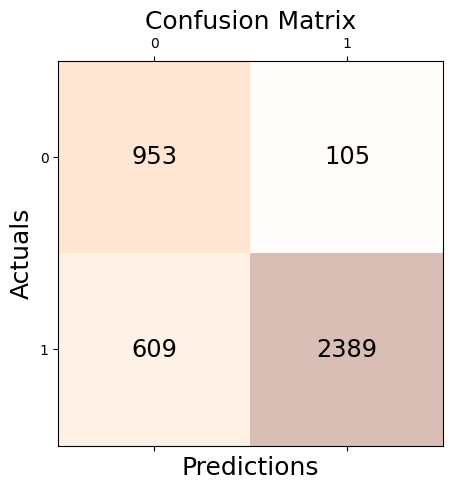

Precision: 0.958
Recall: 0.797
Accuracy: 0.824
F1 Score: 0.870
MCC: 0.629


In [76]:
# Preprocessing texts classified with BERT
metrics(df['sentiment'], df['bert'])

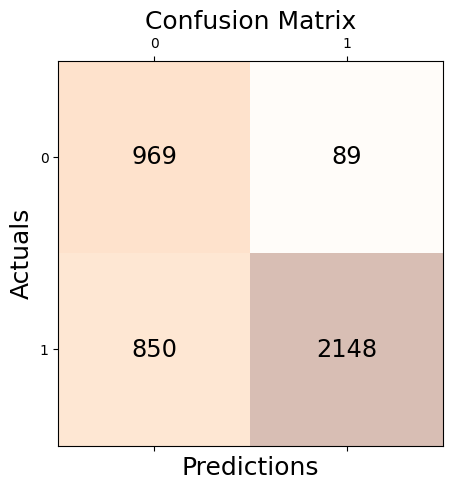

Precision: 0.960
Recall: 0.716
Accuracy: 0.768
F1 Score: 0.821
MCC: 0.558


In [77]:
# Not preprocessing texts classified with BERT
metrics(df['sentiment'], df['org_bert'])

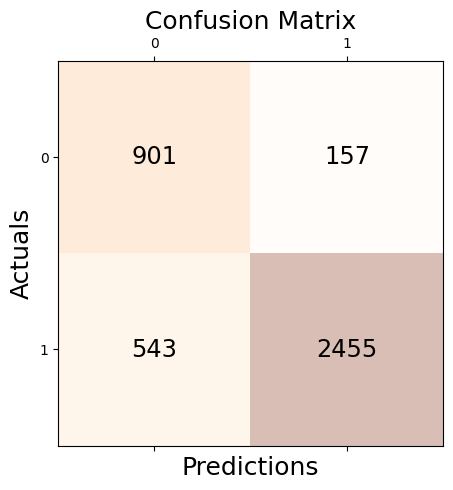

Precision: 0.940
Recall: 0.819
Accuracy: 0.827
F1 Score: 0.875
MCC: 0.615


In [78]:
# Preprocessing texts classified with FinBERT
metrics(df['sentiment'], df['fin_sent'])

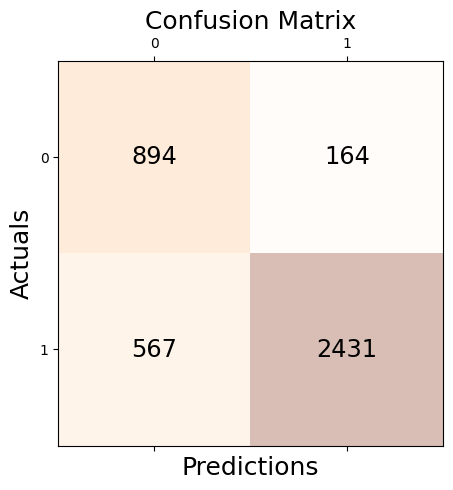

Precision: 0.937
Recall: 0.811
Accuracy: 0.820
F1 Score: 0.869
MCC: 0.600


In [79]:
# Not preprocessing texts classified with FinBERT
metrics(df['sentiment'], df['org_fin_sent'])

### Predicting financial information



In [73]:
path = 'sent_test_data/financial_tweets.csv'
df = pd.read_csv(path)
df

,text,sentiment,text_format,bert,fin_sent,fin_sent_score,org_bert,org_fin_sent,org_fin_sent_score
0,"For the last quarter of 2010 , Componenta 's n...",1,"for the last quarter of 2010 , componenta 's n...",0,1,0.921659,0,1,0.921659
1,"In the third quarter of 2010 , net sales incre...",1,"in the third quarter of 2010 , net sales incre...",1,1,0.938890,1,1,0.938890
2,Operating profit rose to EUR 13.1 mn from EUR ...,1,operating profit rose to eur 13.1 mn from eur ...,0,1,0.926519,0,1,0.926519
3,"Operating profit totalled EUR 21.1 mn , up fro...",1,"operating profit totalled eur 21.1 mn , up fro...",0,1,0.923747,0,1,0.923747
4,Finnish Talentum reports its operating profit ...,1,finnish talentum reports its operating profit ...,0,1,0.927260,0,1,0.927260
...,...,...,...,...,...,...,...,...,...
3821,Operating result for the 12-month period decre...,0,operating result for the 12-month period decre...,0,0,-0.966442,0,0,-0.966442
3822,HELSINKI Thomson Financial - Shares in Cargote...,0,helsinki thomson financial - shares in cargote...,0,0,-0.967987,0,0,-0.967987
3823,LONDON MarketWatch -- Share prices ended lower...,0,london marketwatch -- share prices ended lower...,0,0,-0.957003,0,0,-0.957003
3824,Operating profit fell to EUR 35.4 mn from EUR ...,0,operating profit fell to eur 35.4 mn from eur ...,0,0,-0.967655,0,0,-0.967655


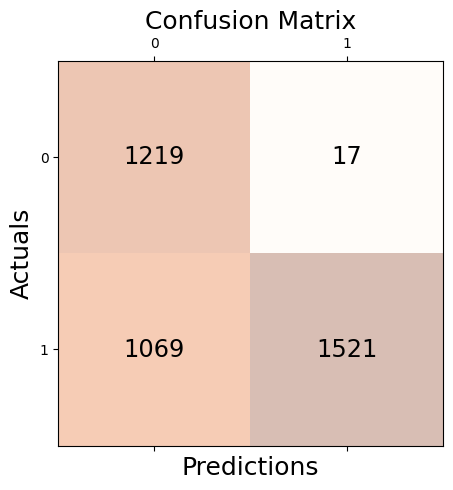

Precision: 0.989
Recall: 0.587
Accuracy: 0.716
F1 Score: 0.737
MCC: 0.547


In [74]:
# Preprocessing texts classified with BERT
metrics(df['sentiment'], df['bert'])

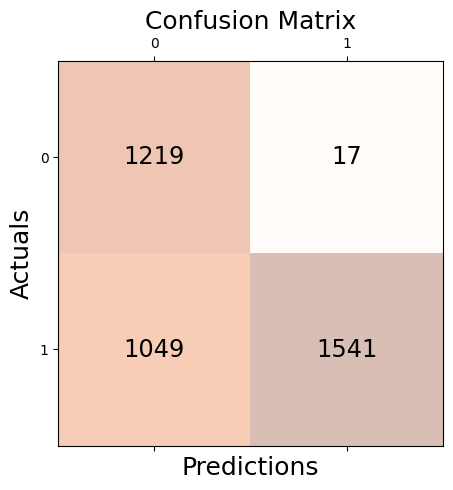

Precision: 0.989
Recall: 0.595
Accuracy: 0.721
F1 Score: 0.743
MCC: 0.553


In [69]:
# Not preprocessing texts classified with BERT
metrics(df['sentiment'], df['org_bert'])

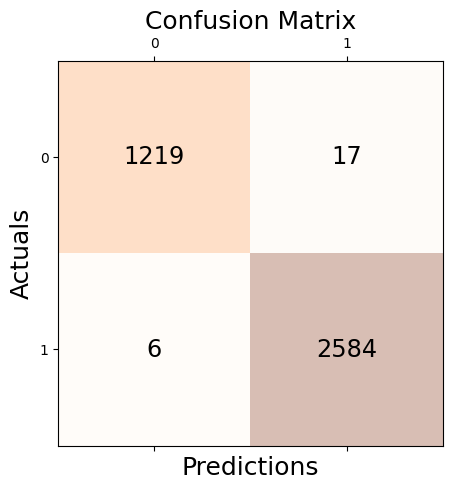

Precision: 0.993
Recall: 0.998
Accuracy: 0.994
F1 Score: 0.996
MCC: 0.986


In [70]:
# Preprocessing texts classified with FinBERT
metrics(df['sentiment'], df['fin_sent'])

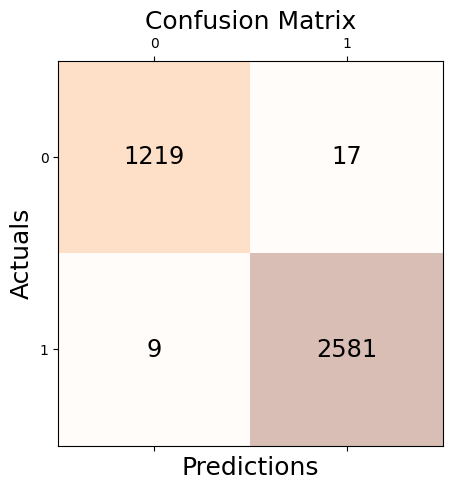

Precision: 0.993
Recall: 0.997
Accuracy: 0.993
F1 Score: 0.995
MCC: 0.984


In [71]:
# Not preprocessing texts classified with FinBERT
metrics(df['sentiment'], df['org_fin_sent'])